1.

$z_0(t) = x(t)$
$z_1(t) = y(t)$
$z_2(t) = x'(t)$
$z_3(t) = y'(t)$


$z_0'(t) = z_2(t)$

$z_1'(t) = z_3(t)$

$z_2'(t) = \frac{\frac{-10(z_0(t) - x_c)}{\sqrt{(z_0(t)-x_c)^2 + z_1(t)-x_c)^2 }} + d_rsin(t\pi)}{m}$

$z_3'(t) = \frac{\frac{-10(z_1(t) - x_c)}{\sqrt{(z_0(t)-x_c)^2 + z_1(t)-x_c)^2 }}}{m}$

First Order System:

$f_0(t,z_0,z_1, z_2, z_3) = z_0'(t) = z_2(t)$

$f_1(t,z_0,z_1, z_2, z_3) = z_1'(t) = z_3(t)$

$f_2(t,z_0,z_1, z_2, z_3) = z_2'(t) = \frac{\frac{-10(z_0(t) - x_c)}{\sqrt{(z_0(t)-x_c)^2 + z_1(t)-x_c)^2 }} + d_rsin(t\pi)}{m}$


$f_3(t,z_0,z_1, z_2, z_3) = z_3'(t) = \frac{\frac{-10(z_1(t) - x_c)}{\sqrt{(z_0(t)-x_c)^2 + z_1(t)-x_c)^2 }}}{m}$

Initial Conditions:

$t_0 = 0, z_0(t_0) = 0, z_1(t_0) = 0, z_2(t_0) = 1.77, z_3(t_0) = -1.77 $

$m= 1, d_r = 0, x_c = 0.5, y_c = 0.5$

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import math
%matplotlib inline
np.seterr(divide='ignore');

In [4]:
#2
def Dynamics(t,z):
    """
    z[0] = x(t)
    z[1] = y(t)
    z[2] = x'(t)
    z[3] = y'(t)
    Output is time derivative:
    dx/dt = z[2]
    dy/dt = z[3]
    dx'/dt from equation (6)
    dy'/dt from equation (7)
    """
    denom = math.sqrt((z[0] - x_c)**2 + (z[1] - y_c)**2)
    x_2nd = (-10*(z[0] - x_c)/denom +  d_r*math.sin(t*math.pi))/m
    y_2nd = (-10*(z[1] - y_c)/denom)/m
    return [z[2], z[3], x_2nd, y_2nd]

In [8]:
#3
x_c = 0.5
y_c = 0.5
m = 1
d_r = 0
tspan = [0, 10]
z = [0,0, 1.77,-1.77]
sol = solve_ivp(Dynamics, tspan, z, max_step = 0.1)

Text(0, 0.5, 'y')

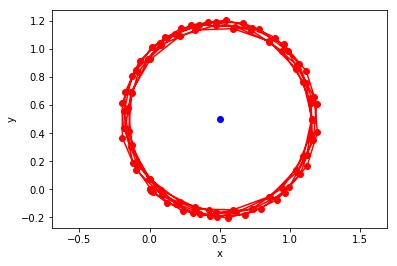

In [9]:
#4
plt.axis('equal')
plt.plot(sol.y[0], sol.y[1], "ro-")
plt.plot(x_c, y_c, 'bo')
plt.xlabel("x")
plt.ylabel("y")

(-0.29507760661712845,
 1.2768984136047328,
 -0.36577333837350584,
 1.357913790238855)

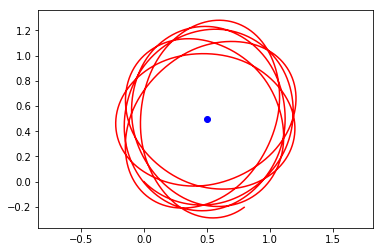

In [10]:
#5
from scipy.interpolate import make_interp_spline
d_r = 0.25
sol2 = solve_ivp(Dynamics, tspan, z)
cs_x = make_interp_spline(sol2.t, sol2.y[0])
cs_y = make_interp_spline(sol2.t, sol2.y[1])
tt = np.linspace(sol2.t[0],sol2.t[-1],700)
xx = [cs_x(t) for t in tt]
yy = [cs_y(t) for t in tt]
plt.plot(xx, yy, 'r')
plt.plot(x_c, y_c, 'bo')
plt.axis('equal')